# Prediction of Credit Risk

## Part 4: Predicting the Credit Risk Using Selected Features Based on SHAP Values in Each fold (Random Forest)

### Load the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

from ipynb.fs.defs.func import histogram, measures, evaluation_plot
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, ConfusionMatrixDisplay

### Load Preprocessed Dataset

In [2]:
with open('x_train.pickle', 'rb')as file:
    x_train=pickle.load(file)
    
with open('x_test.pickle', 'rb')as file:
    x_test=pickle.load(file)
    
with open('y_train.pickle', 'rb')as file:
    y_train=pickle.load(file)
    
with open('y_test.pickle', 'rb')as file:
    y_test=pickle.load(file)

### Cross-Validation and Model Saving for AdaBoost Classifier

In [3]:
kf = KFold(n_splits=5, random_state=0, shuffle= True)

In [4]:
imba_pipeline = make_pipeline(MLPClassifier())
print(f"Cross Validation Score:{cross_val_score(imba_pipeline, x_train, y_train, scoring ='accuracy',cv=kf)}")

MLP_params = {'hidden_layer_sizes': [(3, 5 , 1), (1, 3, 5), (1,5,3) ,(2,4,6), (10, 5), (10,),(5,10),(5,)],
              'activation': ['logistic', 'relu', 'tanh'],
              'max_iter':[10,20,30,40,50,60,70,80,90,100],
              'solver': ['sgd','adam', 'lbfgs'],
              'random_state': [0],
              'early_stopping': [True]}
new_params = {'mlpclassifier__' + key: MLP_params[key] for key in MLP_params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf,
                         scoring='accuracy', return_train_score=True)

MLP= grid_imba.fit(x_train, y_train)

# Get predictions and their indexes for each fold
fold_predictions = []
fold_indexes = []
fold_models = []  # List to store the trained models
fold_train_indexes = []  # List to store train indexes for each fold
for fold, (train_index, val_index) in enumerate(kf.split(x_train), 1):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    imba_pipeline.fit(x_train_fold, y_train_fold)
    fold_pred = imba_pipeline.predict(x_val_fold)
    fold_predictions.append(fold_pred)
    fold_indexes.append(val_index)
    fold_models.append(imba_pipeline)  # Save the trained model
    fold_train_indexes.append(train_index)  # Save the train indexes
    
    # Save the model to a file
    model_filename = f'MLP_fold{fold}.pickle'
    with open(model_filename, 'wb') as f:
        pickle.dump(imba_pipeline, f)

Cross Validation Score:[0.6875     0.72916667 0.69444444 0.70138889 0.78472222]


In [4]:
with open('German_MLP.pkl', 'rb')as file:
    MLP = pickle.load(file)

MLP Accuracy: 0.7444
MLP Precision: 0.64
MLP Recall: 0.5333
MLP F1: 0.5818
MLP Cohen kappa: 0.4


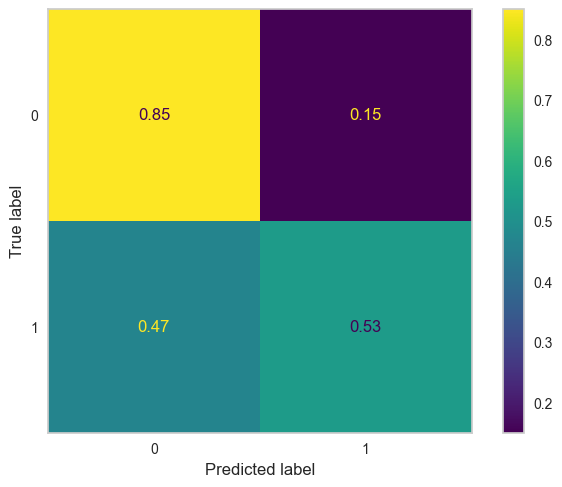

In [5]:
train = x_train.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]
test = x_test.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]

MLP = MLP.fit(train, y_train)

y_pred= MLP.predict(test)

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

MLP Accuracy: 0.7889
MLP Precision: 0.6964
MLP Recall: 0.65
MLP F1: 0.6724
MLP Cohen kappa: 0.5169


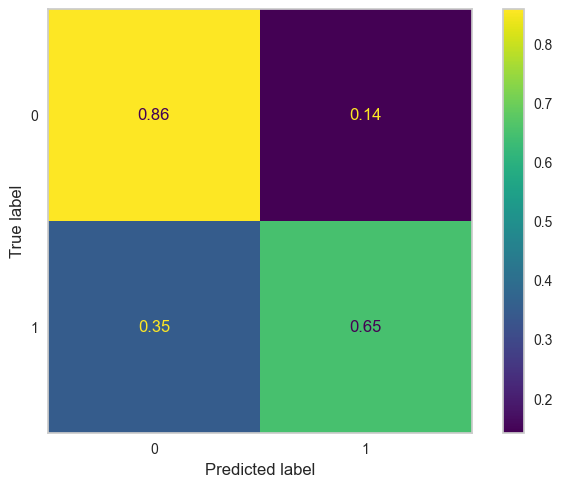

In [7]:
train = x_train.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1'],axis=1)
test = x_test.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1'],axis=1)

MLP = MLP.fit(train, y_train)

y_pred= MLP.predict(test)

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

MLP Accuracy: 0.6889
MLP Precision: 0.5909
MLP Recall: 0.2167
MLP F1: 0.3171
MLP Cohen kappa: 0.1683


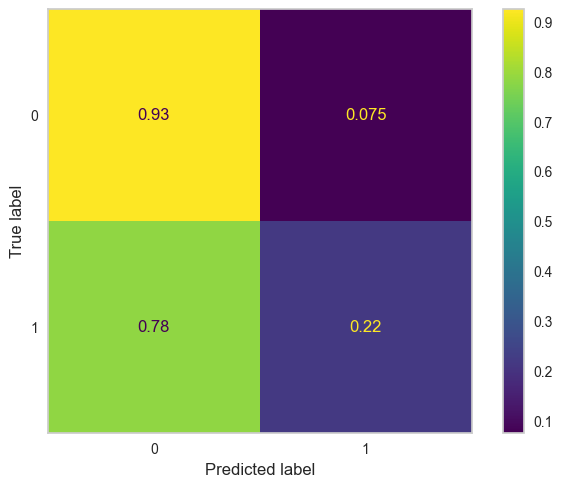

In [8]:
train = x_train.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]
test = x_test.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]

MLP= MLP.fit(train, y_train)

y_pred= MLP.predict(test)

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

MLP Accuracy: 0.7778
MLP Precision: 0.6613
MLP Recall: 0.6833
MLP F1: 0.6721
MLP Cohen kappa: 0.5041


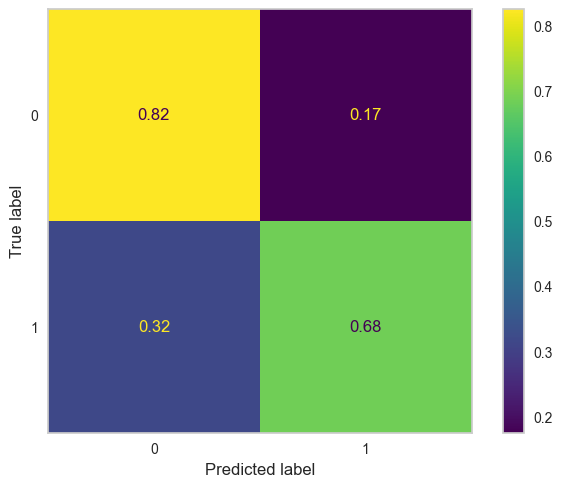

In [10]:
train = x_train.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0'],axis=1)
test = x_test.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0'],axis=1)

MLP = MLP.fit(train, y_train)

y_pred= MLP.predict(test)

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

# Fold 1

In [5]:
with open('MLP_fold1.pickle', 'rb')as file:
    MLP = pickle.load(file)

MLP Accuracy: 0.7167
MLP Precision: 0.5882
MLP Recall: 0.5
MLP F1: 0.5405
MLP Cohen kappa: 0.3377


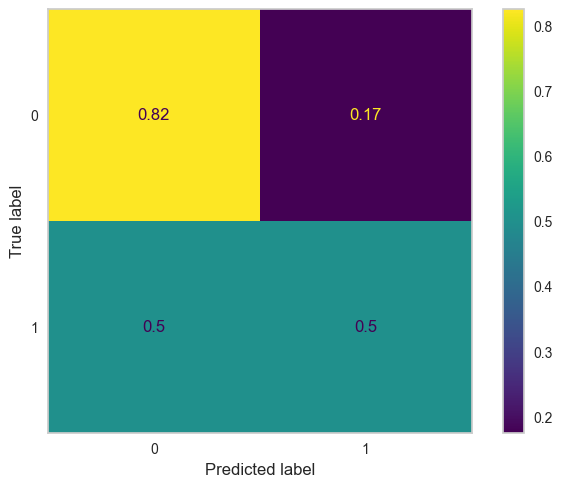

In [6]:
y_pred_MLP = MLP.predict(x_test)

MLP_measurement = measures('MLP', y_test, y_pred_MLP)
pd.DataFrame(y_pred_MLP).to_csv('Fold1_MLP.csv')

evaluation_plot(MLP, x_test, y_test, y_pred_MLP)

## Selected Features with High Positive Impact from Class 1

In [7]:
Fold1 = pd.read_excel('Fold.xlsx', sheet_name='Fold 1')

MLP Accuracy: 0.7444
MLP Precision: 0.64
MLP Recall: 0.5333
MLP F1: 0.5818
MLP Cohen kappa: 0.4


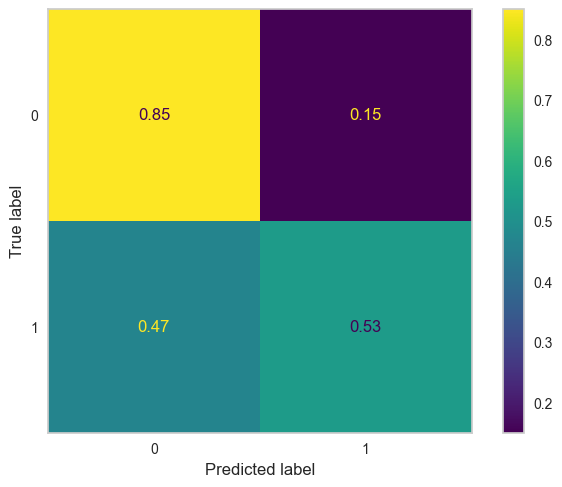

In [8]:
train = Fold1.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]
test = x_test.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]

MLP = MLP.fit(train, Fold1.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold1_MLP1.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Dropping Features with High Negative Impact from Class 1

MLP Accuracy: 0.8611
MLP Precision: 0.7869
MLP Recall: 0.8
MLP F1: 0.7934
MLP Cohen kappa: 0.6888


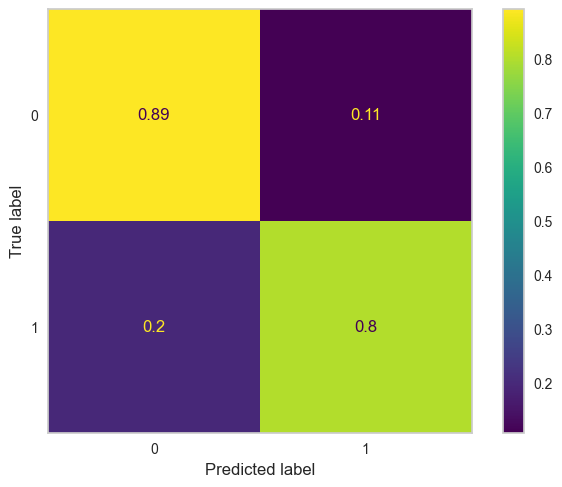

In [9]:
train = Fold1.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1','Unnamed: 0','Class'],axis=1)
test = x_test.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1'],axis=1)

MLP = MLP.fit(train, Fold1.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold1_MLP1D.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Selected Features with High Positive Impact from Class 0

MLP Accuracy: 0.7389
MLP Precision: 0.7407
MLP Recall: 0.3333
MLP F1: 0.4598
MLP Cohen kappa: 0.3188


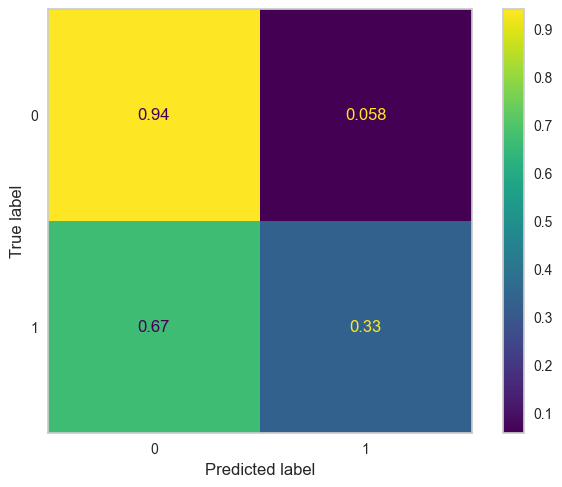

In [11]:
train = Fold1.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]
test = x_test.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]

MLP= MLP.fit(train, Fold1.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold1_MLP0.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Dropping Features with High Negative Impact from Class 0

MLP Accuracy: 0.9056
MLP Precision: 0.8525
MLP Recall: 0.8667
MLP F1: 0.8595
MLP Cohen kappa: 0.7884


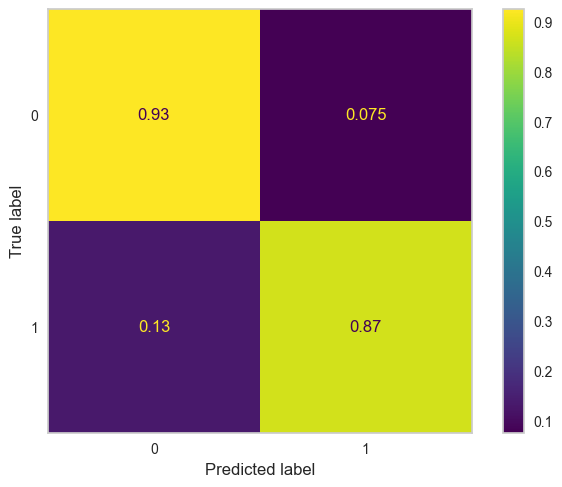

In [12]:
train = Fold1.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0','Unnamed: 0','Class'],axis=1)
test = x_test.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0'],axis=1)

MLP = MLP.fit(train, Fold1.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold1_MLP0D.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

# Fold 2

In [13]:
with open('MLP_fold2.pickle', 'rb')as file:
    MLP = pickle.load(file)

MLP Accuracy: 0.7667
MLP Precision: 0.6452
MLP Recall: 0.6667
MLP F1: 0.6557
MLP Cohen kappa: 0.4793


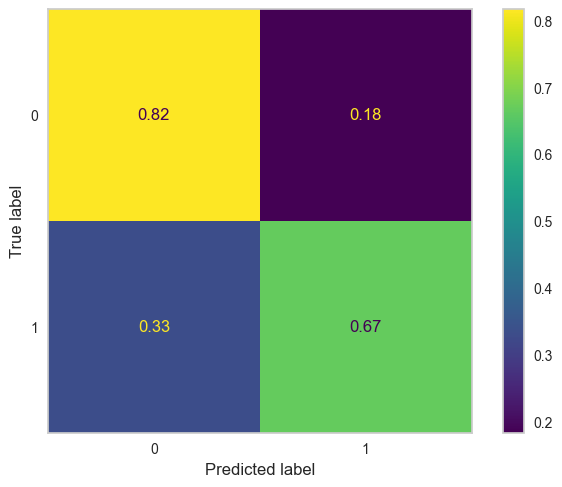

In [14]:
y_pred_MLP = MLP.predict(x_test)

MLP_measurement = measures('MLP', y_test, y_pred_MLP)
pd.DataFrame(y_pred_MLP).to_csv('Fold2_MLP.csv')

evaluation_plot(MLP, x_test, y_test, y_pred_MLP)

## Selected Features with High Positive Impact from Class 1

In [15]:
Fold2 = pd.read_excel('Fold.xlsx', sheet_name='Fold 2')

MLP Accuracy: 0.7444
MLP Precision: 0.64
MLP Recall: 0.5333
MLP F1: 0.5818
MLP Cohen kappa: 0.4


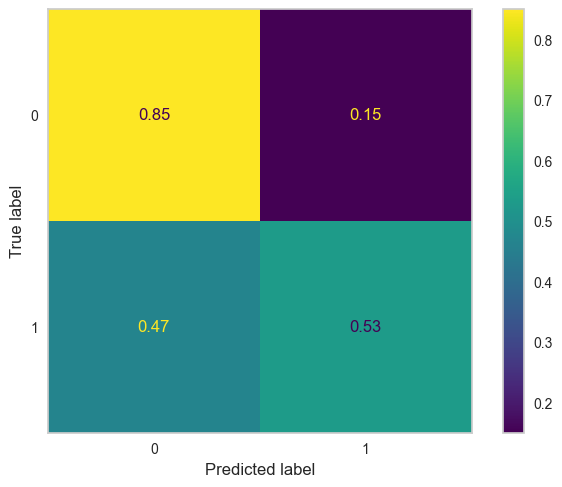

In [16]:
train = Fold2.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]
test = x_test.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]

MLP = MLP.fit(train, Fold2.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold2_MLP1.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Dropping Features with High Negative Impact from Class 1

MLP Accuracy: 0.8778
MLP Precision: 0.8065
MLP Recall: 0.8333
MLP F1: 0.8197
MLP Cohen kappa: 0.7273


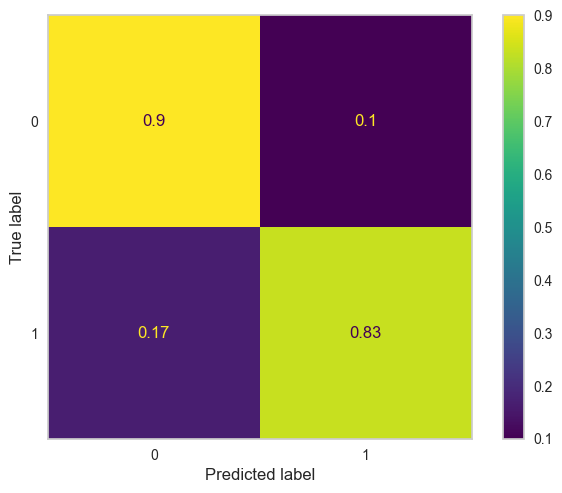

In [17]:
train = Fold2.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1','Unnamed: 0','Class'],axis=1)
test = x_test.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1'],axis=1)

MLP = MLP.fit(train, Fold2.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold2_MLP1D.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Selected Features with High Positive Impact from Class 0

MLP Accuracy: 0.7333
MLP Precision: 0.75
MLP Recall: 0.3
MLP F1: 0.4286
MLP Cohen kappa: 0.2941


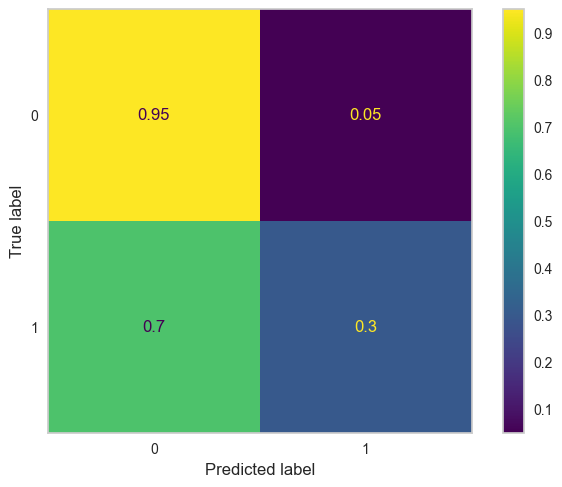

In [18]:
train = Fold2.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]
test = x_test.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]

MLP= MLP.fit(train, Fold2.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold2_MLP0.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Dropping Features with High Negative Impact from Class 0

MLP Accuracy: 0.9056
MLP Precision: 0.8413
MLP Recall: 0.8833
MLP F1: 0.8618
MLP Cohen kappa: 0.7901


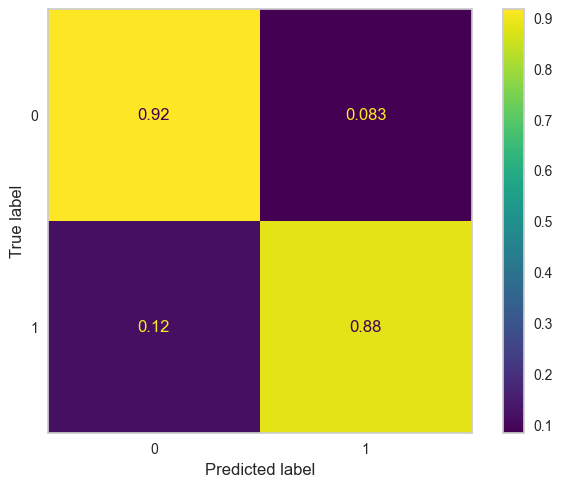

In [19]:
train = Fold2.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0','Unnamed: 0','Class'],axis=1)
test = x_test.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0'],axis=1)

MLP = MLP.fit(train, Fold2.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold2_MLP0D.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

# Fold 3

In [20]:
with open('MLP_fold3.pickle', 'rb')as file:
    MLP = pickle.load(file)

MLP Accuracy: 0.7444
MLP Precision: 0.6167
MLP Recall: 0.6167
MLP F1: 0.6167
MLP Cohen kappa: 0.425


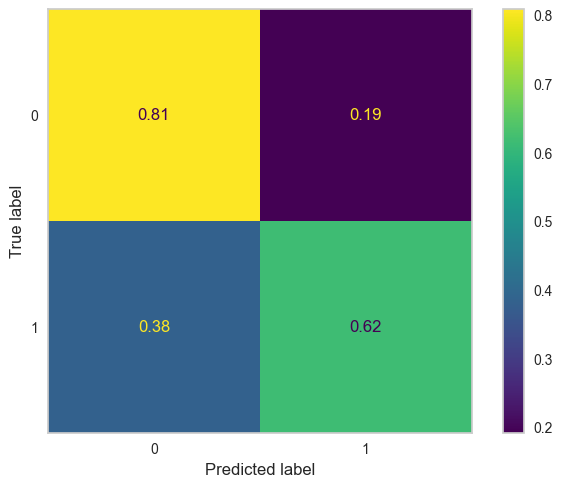

In [21]:
y_pred_MLP = MLP.predict(x_test)

MLP_measurement = measures('MLP', y_test, y_pred_MLP)
pd.DataFrame(y_pred_MLP).to_csv('Fold3_MLP.csv')

evaluation_plot(MLP, x_test, y_test, y_pred_MLP)

## Selected Features with High Positive Impact from Class 1

In [22]:
Fold3 = pd.read_excel('Fold.xlsx', sheet_name='Fold 3')

MLP Accuracy: 0.7444
MLP Precision: 0.64
MLP Recall: 0.5333
MLP F1: 0.5818
MLP Cohen kappa: 0.4


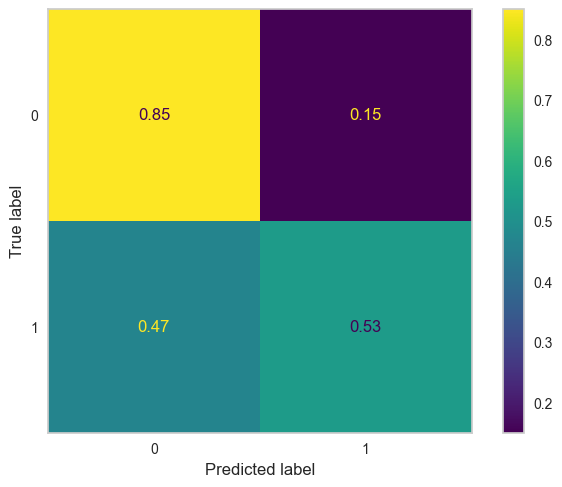

In [23]:
train = Fold3.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]
test = x_test.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]

MLP = MLP.fit(train, Fold3.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold3_MLP1.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Dropping Features with High Negative Impact from Class 1

MLP Accuracy: 0.8833
MLP Precision: 0.8095
MLP Recall: 0.85
MLP F1: 0.8293
MLP Cohen kappa: 0.7407


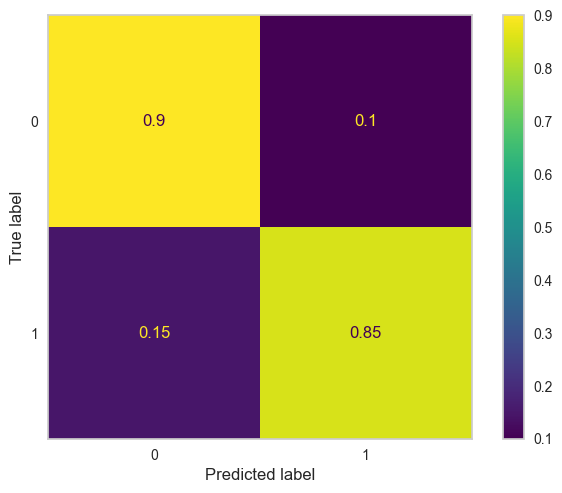

In [24]:
train = Fold3.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1','Unnamed: 0','Class'],axis=1)
test = x_test.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1'],axis=1)

MLP = MLP.fit(train, Fold3.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold3_MLP1D.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Selected Features with High Positive Impact from Class 0

MLP Accuracy: 0.7444
MLP Precision: 0.7692
MLP Recall: 0.3333
MLP F1: 0.4651
MLP Cohen kappa: 0.3301


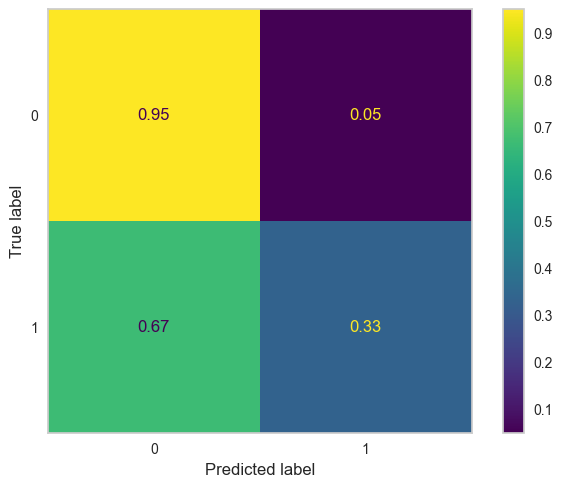

In [25]:
train = Fold3.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]
test = x_test.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]

MLP= MLP.fit(train, Fold3.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold3_MLP0.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Dropping Features with High Negative Impact from Class 0

MLP Accuracy: 0.8667
MLP Precision: 0.7812
MLP Recall: 0.8333
MLP F1: 0.8065
MLP Cohen kappa: 0.7049


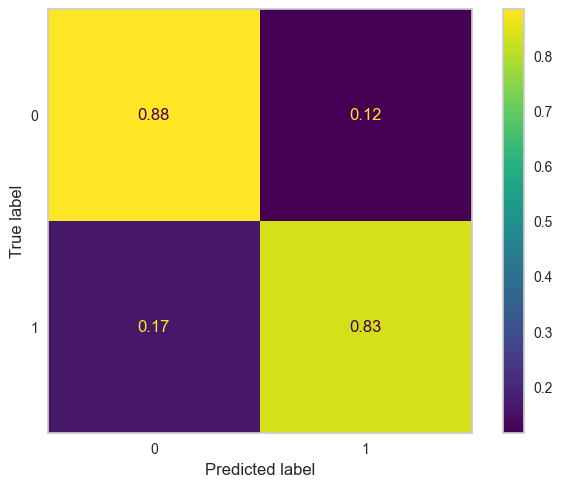

In [26]:
train = Fold3.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0','Unnamed: 0','Class'],axis=1)
test = x_test.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0'],axis=1)

MLP = MLP.fit(train, Fold3.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold3_MLP0D.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

# Fold 4

In [27]:
with open('MLP_fold4.pickle', 'rb')as file:
    MLP = pickle.load(file)

MLP Accuracy: 0.7333
MLP Precision: 0.6111
MLP Recall: 0.55
MLP F1: 0.5789
MLP Cohen kappa: 0.3846


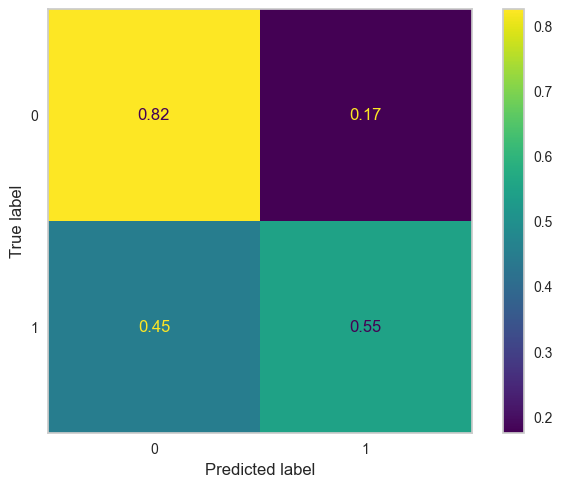

In [28]:
y_pred_MLP = MLP.predict(x_test)

MLP_measurement = measures('MLP', y_test, y_pred_MLP)
pd.DataFrame(y_pred_MLP).to_csv('Fold4_MLP.csv')

evaluation_plot(MLP, x_test, y_test, y_pred_MLP)

## Selected Features with High Positive Impact from Class 1

In [29]:
Fold4 = pd.read_excel('Fold.xlsx', sheet_name='Fold 4')

MLP Accuracy: 0.7444
MLP Precision: 0.64
MLP Recall: 0.5333
MLP F1: 0.5818
MLP Cohen kappa: 0.4


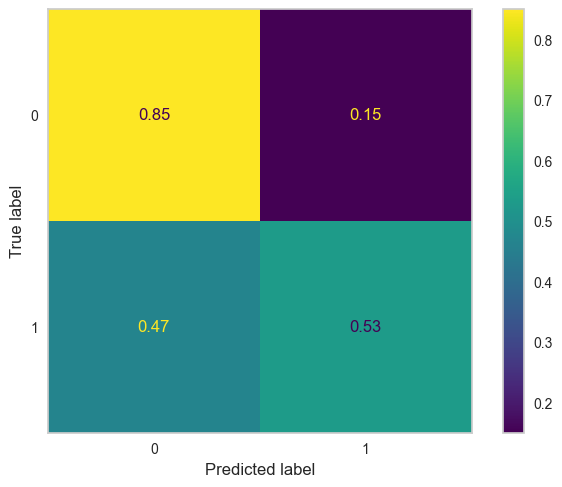

In [30]:
train = Fold4.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]
test = x_test.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]

MLP = MLP.fit(train, Fold4.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold4_MLP1.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Dropping Features with High Negative Impact from Class 1

MLP Accuracy: 0.8778
MLP Precision: 0.8167
MLP Recall: 0.8167
MLP F1: 0.8167
MLP Cohen kappa: 0.725


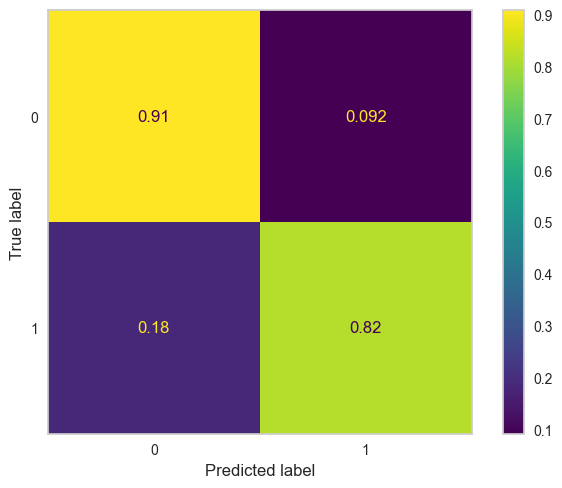

In [31]:
train = Fold4.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1','Unnamed: 0','Class'],axis=1)
test = x_test.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1'],axis=1)

MLP = MLP.fit(train, Fold4.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold4_MLP1D.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Selected Features with High Positive Impact from Class 0

MLP Accuracy: 0.7389
MLP Precision: 0.7407
MLP Recall: 0.3333
MLP F1: 0.4598
MLP Cohen kappa: 0.3188


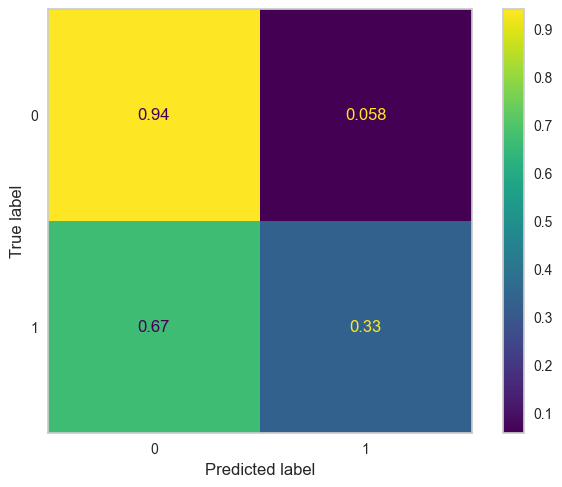

In [33]:
train = Fold4.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]
test = x_test.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]

MLP= MLP.fit(train, Fold4.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold4_MLP0.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Dropping Features with High Negative Impact from Class 0

MLP Accuracy: 0.8944
MLP Precision: 0.8361
MLP Recall: 0.85
MLP F1: 0.843
MLP Cohen kappa: 0.7635


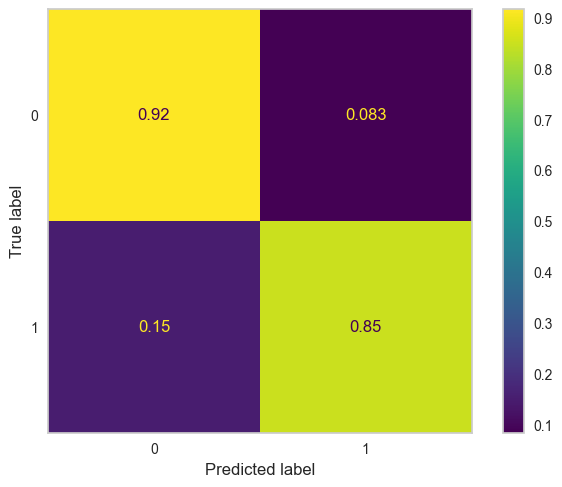

In [34]:
train = Fold4.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0','Unnamed: 0','Class'],axis=1)
test = x_test.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0'],axis=1)

MLP = MLP.fit(train, Fold4.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold4_MLP0D.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

# Fold 5

In [35]:
with open('MLP_fold5.pickle', 'rb')as file:
    MLP = pickle.load(file)

MLP Accuracy: 0.7444
MLP Precision: 0.64
MLP Recall: 0.5333
MLP F1: 0.5818
MLP Cohen kappa: 0.4


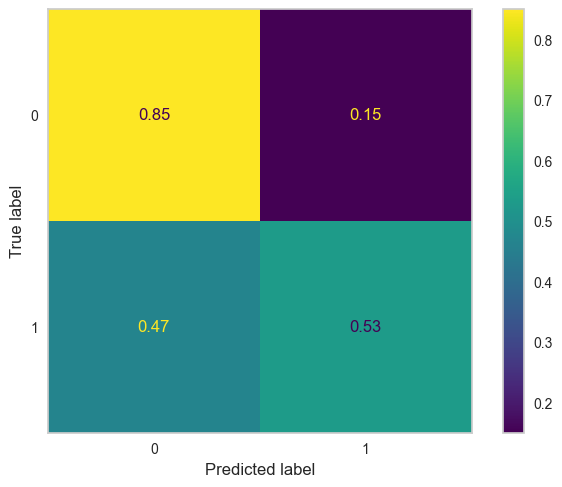

In [36]:
y_pred_MLP = MLP.predict(x_test)

MLP_measurement = measures('MLP', y_test, y_pred_MLP)
pd.DataFrame(y_pred_MLP).to_csv('Fold5_MLP.csv')

evaluation_plot(MLP, x_test, y_test, y_pred_MLP)

## Selected Features with High Positive Impact from Class 1

In [37]:
Fold5 = pd.read_excel('Fold.xlsx', sheet_name='Fold 5')

MLP Accuracy: 0.7444
MLP Precision: 0.64
MLP Recall: 0.5333
MLP F1: 0.5818
MLP Cohen kappa: 0.4


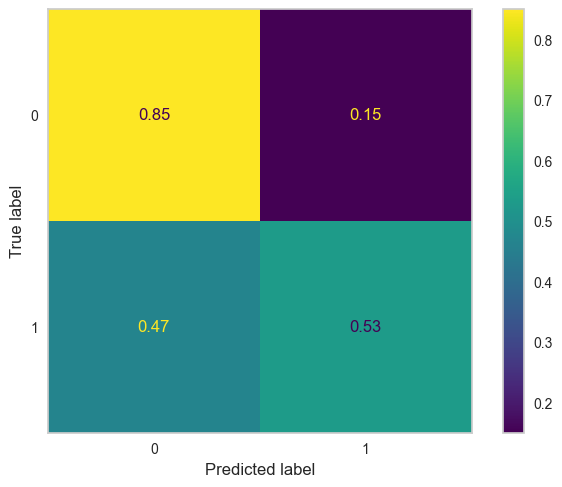

In [38]:
train = Fold5.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]
test = x_test.loc[:, ['Purpose_1','Present_emp_3','Job_1','Property_0',
                      'checking account_2','Credit_his_4','Savings account_4']]

MLP = MLP.fit(train, Fold5.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold5_MLP1.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Dropping Features with High Negative Impact from Class 1

MLP Accuracy: 0.8722
MLP Precision: 0.8033
MLP Recall: 0.8167
MLP F1: 0.8099
MLP Cohen kappa: 0.7137


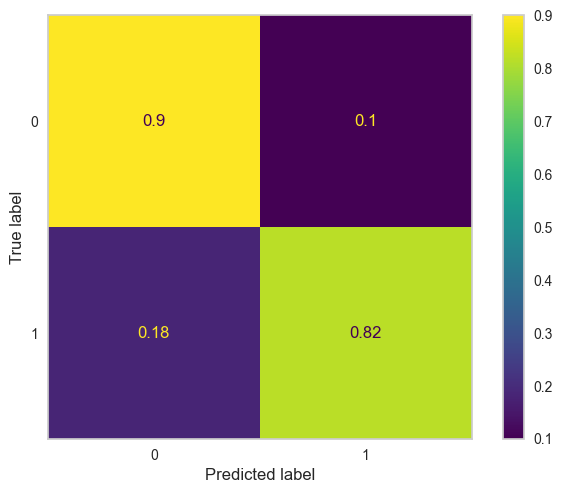

In [40]:
train = Fold5.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1','Unnamed: 0','Class'],axis=1)
test = x_test.drop(['Purpose_9','Savings account_1','Purpose_0','Credit_his_1',
                    'Num_people','Housing_0','Property_3','Present_emp_1','Other_install_0',
                    'Job_3','Credit_his_0','sex_3','Other_install_2','sex_0','Housing_2','other_debtor_1'],axis=1)

MLP = MLP.fit(train, Fold5.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold5_MLP1D.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Selected Features with High Positive Impact from Class 0

MLP Accuracy: 0.7444
MLP Precision: 0.7692
MLP Recall: 0.3333
MLP F1: 0.4651
MLP Cohen kappa: 0.3301


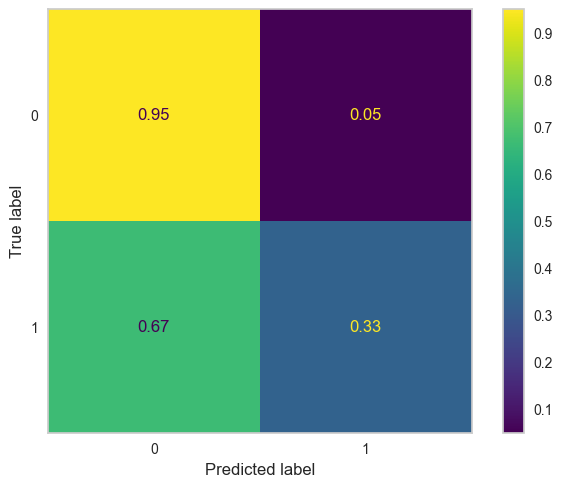

In [41]:
train = Fold5.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]
test = x_test.loc[:, ['Credit_his_1','Purpose_9','Property_3','Credit_his_0','Present_emp_1',
                      'Job_3','Num_people','sex_0','Savings account_1','sex_3','Housing_0']]

MLP= MLP.fit(train, Fold5.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold5_MLP0.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)

## Dropping Features with High Negative Impact from Class 0

MLP Accuracy: 0.8778
MLP Precision: 0.7794
MLP Recall: 0.8833
MLP F1: 0.8281
MLP Cohen kappa: 0.7339


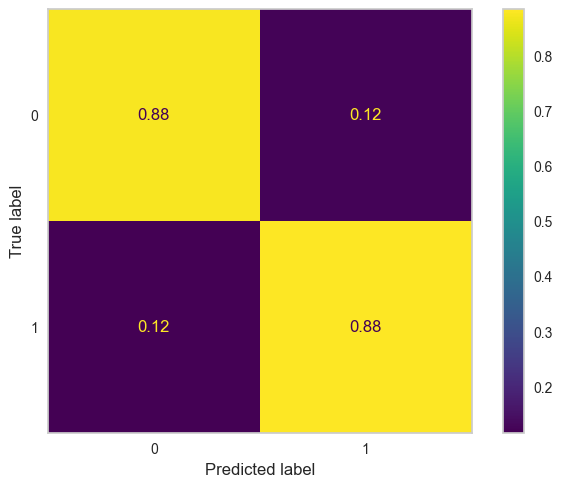

In [42]:
train = Fold5.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0','Unnamed: 0','Class'],axis=1)
test = x_test.drop(['Purpose_1','Present_emp_3','Job_1','Savings account_4','Property_0'],axis=1)

MLP = MLP.fit(train, Fold5.loc[:, ['Class']])

y_pred= MLP.predict(test)
pd.DataFrame(y_pred).to_csv('Fold5_MLP0D.csv')

MLP_measurement = measures('MLP', y_test, y_pred)

evaluation_plot(MLP, test, y_test, y_pred)